In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from sklearn.decomposition import PCA

In [2]:
imagem = cv2.imread('olhos_verdes.jpg')
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
imagem.shape

(3096, 5416, 3)

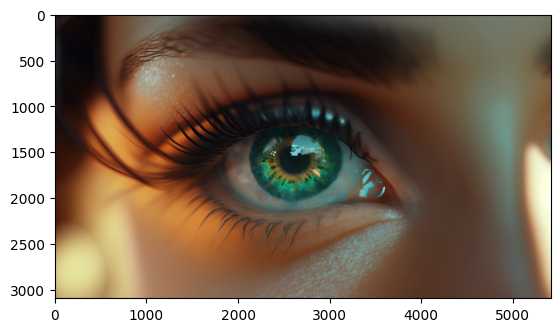

In [3]:
plt.imshow(imagem)

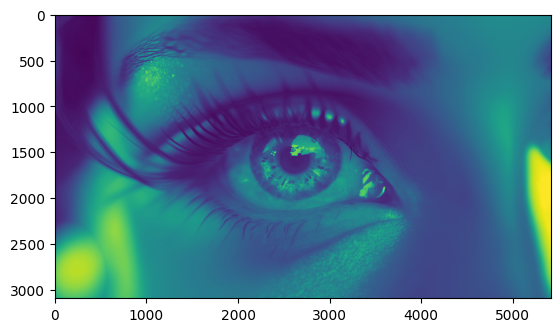

In [9]:
(r, g, b) = cv2.split(imagem)
r, g, b = r/255, g/255, b/255
plt.imshow(g)

In [11]:
pca_components = 50
pca_r = PCA(n_components= pca_components)
r_reduz = pca_r.fit_transform(r)

pca_g = PCA(n_components= pca_components)
g_reduz = pca_g.fit_transform(g)

pca_b = PCA(n_components= pca_components)
b_reduz = pca_b.fit_transform(b)

In [12]:
b_reduz.shape

(3096, 50)

In [13]:
junto = np.asarray([r_reduz, g_reduz, b_reduz])

In [14]:
recon_r = pca_r.inverse_transform(r_reduz)
recon_g = pca_g.inverse_transform(g_reduz)
recon_b = pca_b.inverse_transform(b_reduz)

In [15]:
recon_r.shape

(3096, 5416)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


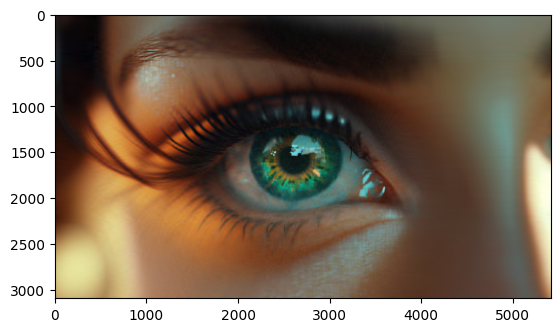

In [18]:
img_recon = cv2.merge((recon_r, recon_g, recon_b))
plt.imshow(img_recon)

In [ ]:
# tamanho imagem original - 1677kb
# tamanho imagem reduzida - 191kb